In [0]:
import torch

from torchvision import utils
# module utils to obtain the neural network
from torchvision import models
from torchvision import datasets
from torchvision import transforms
# transforms when working with images, mean, normalisation, standard deviation

from PIL import Image
# to manipulate images
import urllib.request as request
# to bring the image form the internet
from matplotlib import pyplot as plt

# Modelo Pre-entrenado

---



---



In [2]:
# well use inception which is a computer vision model 
inception = models.inception_v3(pretrained=True)

Downloading: "https://download.pytorch.org/models/inception_v3_google-1a9a5a14.pth" to /root/.cache/torch/checkpoints/inception_v3_google-1a9a5a14.pth
100%|██████████| 104M/104M [00:06<00:00, 18.0MB/s]


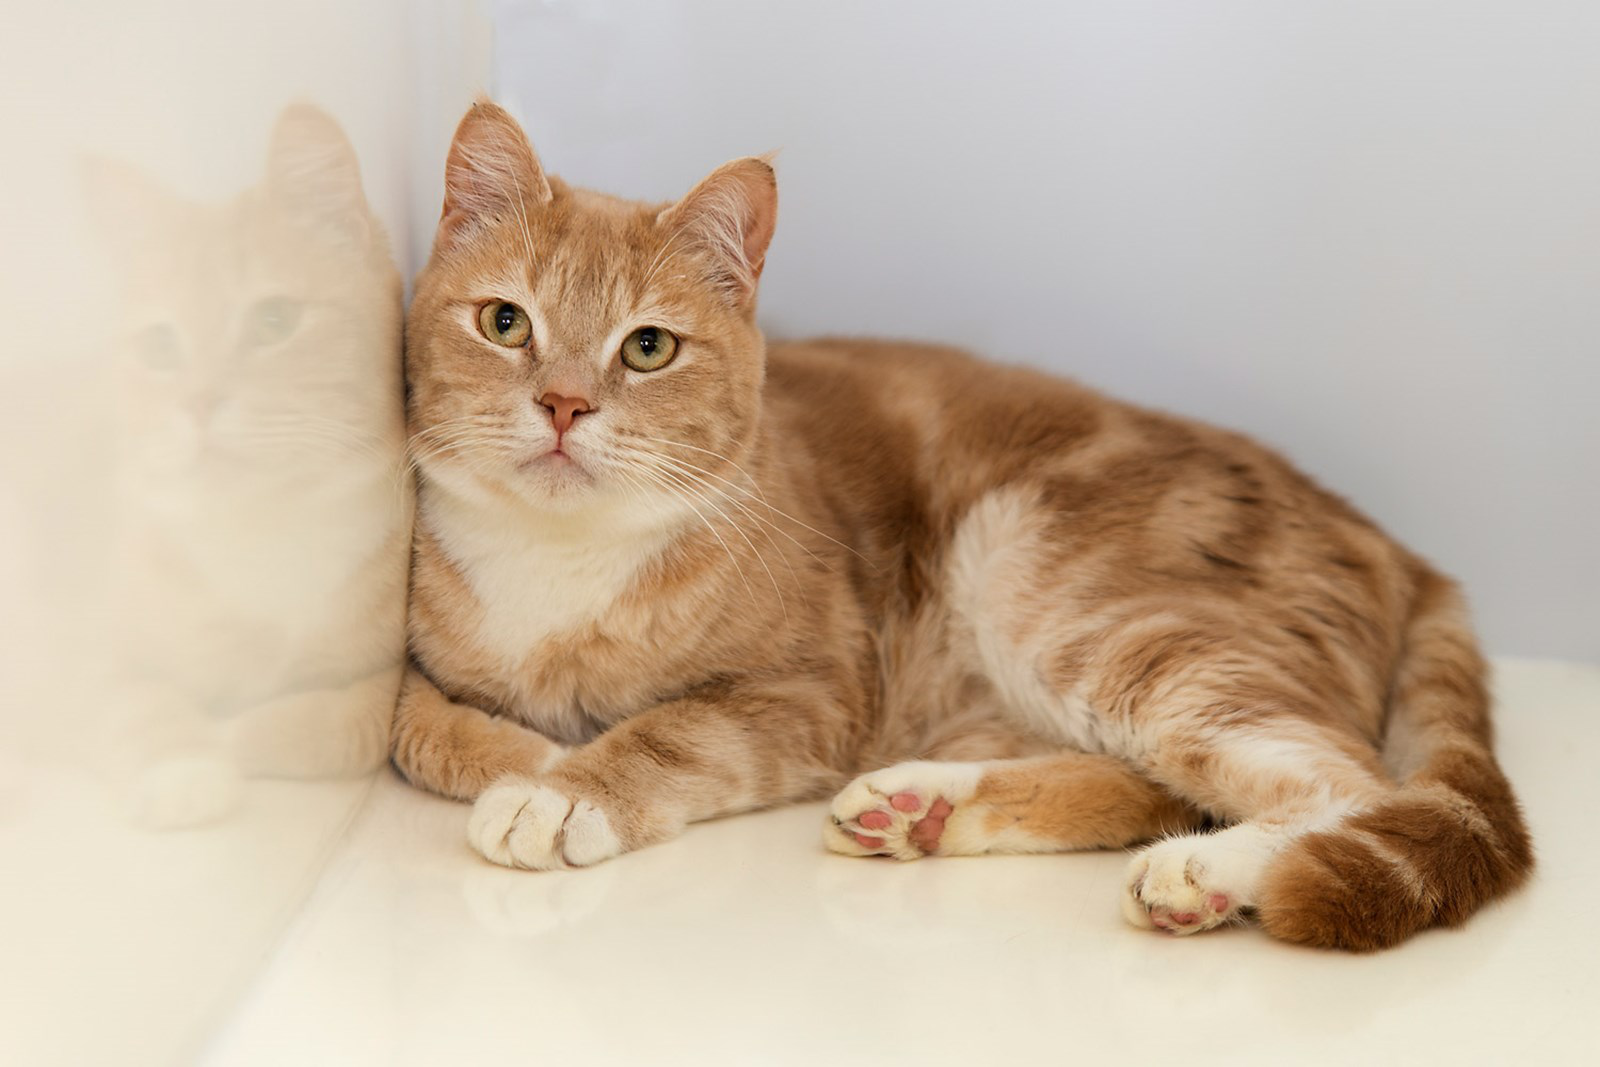

In [3]:
url = 'https://www.cats.org.uk/media/2197/financial-assistance.jpg?width=1600'
image = request.urlretrieve(url, 'test.jpg')
img = Image.open(image[0])
img

In [4]:
# now lets transform this image
#Resize change image size
#CenterCrop to center alignment
# ToTensor, converts image to tensors
# Normilize, mean and std to normlise all values in models websites
# with these number our image will be normalised
preprocess = transforms.Compose([
   transforms.Resize(128),
   transforms.CenterCrop(128),
   transforms.ToTensor(),
   transforms.Normalize(
       mean=[0.485, 0.456, 0.406],
       std=[0.229, 0.224, 0.225]
   )
])
preprocess

Compose(
    Resize(size=128, interpolation=PIL.Image.BILINEAR)
    CenterCrop(size=(128, 128))
    ToTensor()
    Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


tensor([[[1.7352, 1.7352, 1.7352,  ..., 1.4954, 1.4783, 1.4783],
         [1.7352, 1.7352, 1.7352,  ..., 1.4954, 1.4783, 1.4783],
         [1.7352, 1.7352, 1.7180,  ..., 1.4783, 1.4783, 1.4783],
         ...,
         [2.0948, 2.0948, 2.0948,  ..., 1.9235, 1.9064, 1.9235],
         [2.0777, 2.0777, 2.0948,  ..., 1.9235, 1.9235, 1.9235],
         [2.0777, 2.0948, 2.0948,  ..., 1.9578, 1.9407, 1.9407]],

        [[1.7808, 1.7808, 1.7808,  ..., 1.6583, 1.6408, 1.6408],
         [1.7808, 1.7808, 1.7808,  ..., 1.6583, 1.6408, 1.6408],
         [1.7808, 1.7808, 1.7633,  ..., 1.6408, 1.6408, 1.6408],
         ...,
         [2.1835, 2.1835, 2.2010,  ..., 1.9909, 1.9909, 2.0084],
         [2.2010, 2.2010, 2.2010,  ..., 2.0084, 2.0084, 2.0084],
         [2.2010, 2.2185, 2.2185,  ..., 2.0434, 2.0259, 2.0259]],

        [[1.8208, 1.8208, 1.8208,  ..., 1.9080, 1.8731, 1.8557],
         [1.8208, 1.8208, 1.8208,  ..., 1.8731, 1.8557, 1.8557],
         [1.8208, 1.8208, 1.8034,  ..., 1.8557, 1.8557, 1.

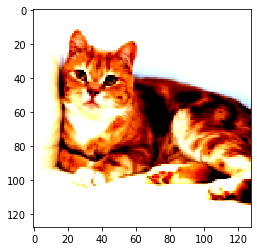

In [5]:
# Transformed image
img_t = preprocess(img)
# additional transformation on image
batch = torch.unsqueeze(img_t, 0)
print(img_t)
print(batch)
plt.imshow(img_t.permute(1,2,0))

In [6]:
inception.eval()

Inception3(
  (Conv2d_1a_3x3): BasicConv2d(
    (conv): Conv2d(3, 32, kernel_size=(3, 3), stride=(2, 2), bias=False)
    (bn): BatchNorm2d(32, eps=0.001, momentum=0.1, affine=True, track_running_stats=True)
  )
  (Conv2d_2a_3x3): BasicConv2d(
    (conv): Conv2d(32, 32, kernel_size=(3, 3), stride=(1, 1), bias=False)
    (bn): BatchNorm2d(32, eps=0.001, momentum=0.1, affine=True, track_running_stats=True)
  )
  (Conv2d_2b_3x3): BasicConv2d(
    (conv): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
    (bn): BatchNorm2d(64, eps=0.001, momentum=0.1, affine=True, track_running_stats=True)
  )
  (Conv2d_3b_1x1): BasicConv2d(
    (conv): Conv2d(64, 80, kernel_size=(1, 1), stride=(1, 1), bias=False)
    (bn): BatchNorm2d(80, eps=0.001, momentum=0.1, affine=True, track_running_stats=True)
  )
  (Conv2d_4a_3x3): BasicConv2d(
    (conv): Conv2d(80, 192, kernel_size=(3, 3), stride=(1, 1), bias=False)
    (bn): BatchNorm2d(192, eps=0.001, momentum=0.1, affine=True, t

In [7]:
# Image transformation
out = inception(batch)
out

tensor([[-5.1738e-01, -9.0671e-01, -1.9227e+00, -7.7068e-01, -3.7527e+00,
         -1.7138e+00,  3.0821e-01, -2.6342e+00,  1.5237e+00,  2.1850e-01,
          1.3406e+00, -1.2906e+00,  6.1863e+00, -1.6799e+00, -3.8720e+00,
          2.4603e+00, -1.4107e+00, -1.2905e+00, -5.8531e+00, -3.7963e+00,
         -3.2296e+00, -3.4919e+00, -2.7725e-01, -1.8617e+00, -6.7124e-03,
         -1.6975e+00, -1.8909e+00, -1.2015e+00, -1.3449e+00, -3.9318e+00,
          8.8300e+00,  5.8164e+00,  2.5698e+00, -1.8049e+00, -5.6964e-01,
         -2.3635e+00, -5.1669e+00, -5.5627e-01,  1.6513e+00, -1.0257e+00,
         -2.3450e+00, -4.5363e+00, -5.3244e-01,  4.3770e-01, -5.0849e+00,
         -3.7199e+00, -3.7713e+00, -8.1522e-01, -6.5902e+00, -2.2182e+00,
         -4.1643e+00,  5.1014e+00, -2.5988e+00, -2.0522e+00, -3.6180e+00,
         -3.2841e+00, -3.2470e+00, -8.7985e-02, -2.0455e+00, -2.1351e+00,
         -4.2759e+00, -1.5787e+00, -3.7037e+00, -3.2533e+00, -3.7832e+00,
         -3.7667e-01,  1.1530e+00, -1.

In [8]:
request.urlretrieve('https://gist.githubusercontent.com/ykro/acb00a36f737c12013f6e0f8a0d2cb61/raw/a2bb113b83e274048992f6550050a437fa4db76d/imagenet_classes.txt', 'labels.txt')
with open('labels.txt') as f:
    labels = [line.strip() for line in f.readlines()]

len(labels)

1000

In [9]:
out

tensor([[-5.1738e-01, -9.0671e-01, -1.9227e+00, -7.7068e-01, -3.7527e+00,
         -1.7138e+00,  3.0821e-01, -2.6342e+00,  1.5237e+00,  2.1850e-01,
          1.3406e+00, -1.2906e+00,  6.1863e+00, -1.6799e+00, -3.8720e+00,
          2.4603e+00, -1.4107e+00, -1.2905e+00, -5.8531e+00, -3.7963e+00,
         -3.2296e+00, -3.4919e+00, -2.7725e-01, -1.8617e+00, -6.7124e-03,
         -1.6975e+00, -1.8909e+00, -1.2015e+00, -1.3449e+00, -3.9318e+00,
          8.8300e+00,  5.8164e+00,  2.5698e+00, -1.8049e+00, -5.6964e-01,
         -2.3635e+00, -5.1669e+00, -5.5627e-01,  1.6513e+00, -1.0257e+00,
         -2.3450e+00, -4.5363e+00, -5.3244e-01,  4.3770e-01, -5.0849e+00,
         -3.7199e+00, -3.7713e+00, -8.1522e-01, -6.5902e+00, -2.2182e+00,
         -4.1643e+00,  5.1014e+00, -2.5988e+00, -2.0522e+00, -3.6180e+00,
         -3.2841e+00, -3.2470e+00, -8.7985e-02, -2.0455e+00, -2.1351e+00,
         -4.2759e+00, -1.5787e+00, -3.7037e+00, -3.2533e+00, -3.7832e+00,
         -3.7667e-01,  1.1530e+00, -1.

In [0]:
_, index = torch.max(out, 1)

In [11]:
percentage = torch.nn.functional.softmax(out, dim=1)[0] * 100
#print(len(percentage))
labels[index[0]], percentage[index[0]].item()

('tabby, tabby cat', 74.80986785888672)

In [12]:
_, indices = torch.sort(out, descending=True)

top_five = indices[0][:5]
for i in top_five:
  print(labels[i], percentage[i].item())

tabby, tabby cat 74.80986785888672
tiger cat 25.081836700439453
Egyptian cat 0.1074744239449501
lynx, catamount 0.0007518202182836831
totem pole 3.356118395458907e-05


# Trabajando con un dataset

---



---



In [13]:
# Create two datasets for training and validation
data_path = 'data/'
dataset = datasets.CIFAR10(data_path, train=True, download=True)
validation_set = datasets.CIFAR10(data_path, train=False, download=True)

  0%|          | 0/170498071 [00:00<?, ?it/s]

170500096it [00:03, 55104835.89it/s]                               


Extracting data/cifar-10-python.tar.gz to data/
Files already downloaded and verified


In [0]:
# Create classes of datasets
classes = ['plane','car','bird','cat','deer','dog','frog','horse','ship','truck']

In [15]:
len(dataset)

50000

In [16]:
img, label = dataset[50]
img, label, classes[label]

(<PIL.Image.Image image mode=RGB size=32x32 at 0x7FE1F2AC4898>, 9, 'truck')

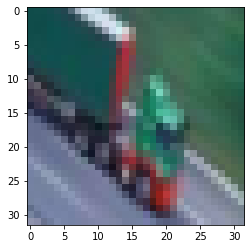

In [17]:
plt.imshow(img)

In [18]:
# Convert iage to tensor
tensor_transform = transforms.ToTensor()

img_tensor = tensor_transform(img)

img, img_tensor, img_tensor.shape
# .Size([3,32,32]) 3 dimensions, 32 by 32 size of image

(<PIL.Image.Image image mode=RGB size=32x32 at 0x7FE1F2AC4898>,
 tensor([[[0.0627, 0.0667, 0.0667,  ..., 0.2431, 0.2157, 0.2000],
          [0.0627, 0.0627, 0.0588,  ..., 0.2431, 0.2275, 0.2039],
          [0.0627, 0.0588, 0.0588,  ..., 0.2235, 0.2314, 0.2196],
          ...,
          [0.3765, 0.4471, 0.4667,  ..., 0.5020, 0.4706, 0.4588],
          [0.4627, 0.3922, 0.4471,  ..., 0.5451, 0.5137, 0.4745],
          [0.5647, 0.5333, 0.4118,  ..., 0.5686, 0.5373, 0.5137]],
 
         [[0.2980, 0.3020, 0.3020,  ..., 0.4157, 0.3882, 0.3686],
          [0.2980, 0.2980, 0.2941,  ..., 0.4275, 0.4118, 0.3922],
          [0.2980, 0.2941, 0.2941,  ..., 0.4314, 0.4353, 0.4275],
          ...,
          [0.4314, 0.4980, 0.5176,  ..., 0.5294, 0.5098, 0.5137],
          [0.5176, 0.4431, 0.4941,  ..., 0.5725, 0.5490, 0.5255],
          [0.5804, 0.5490, 0.4471,  ..., 0.5922, 0.5647, 0.5529]],
 
         [[0.2902, 0.2941, 0.2941,  ..., 0.3412, 0.3137, 0.2941],
          [0.2902, 0.2902, 0.2902,  ..., 0

In [19]:
# dataset is a representation of tensor
dataset = datasets.CIFAR10(data_path, train=True, download=True, transform=transforms.ToTensor())

Files already downloaded and verified


In [20]:
# Now the image is a tensor
img, label = dataset[50]
img

tensor([[[0.0627, 0.0667, 0.0667,  ..., 0.2431, 0.2157, 0.2000],
         [0.0627, 0.0627, 0.0588,  ..., 0.2431, 0.2275, 0.2039],
         [0.0627, 0.0588, 0.0588,  ..., 0.2235, 0.2314, 0.2196],
         ...,
         [0.3765, 0.4471, 0.4667,  ..., 0.5020, 0.4706, 0.4588],
         [0.4627, 0.3922, 0.4471,  ..., 0.5451, 0.5137, 0.4745],
         [0.5647, 0.5333, 0.4118,  ..., 0.5686, 0.5373, 0.5137]],

        [[0.2980, 0.3020, 0.3020,  ..., 0.4157, 0.3882, 0.3686],
         [0.2980, 0.2980, 0.2941,  ..., 0.4275, 0.4118, 0.3922],
         [0.2980, 0.2941, 0.2941,  ..., 0.4314, 0.4353, 0.4275],
         ...,
         [0.4314, 0.4980, 0.5176,  ..., 0.5294, 0.5098, 0.5137],
         [0.5176, 0.4431, 0.4941,  ..., 0.5725, 0.5490, 0.5255],
         [0.5804, 0.5490, 0.4471,  ..., 0.5922, 0.5647, 0.5529]],

        [[0.2902, 0.2941, 0.2941,  ..., 0.3412, 0.3137, 0.2941],
         [0.2902, 0.2902, 0.2902,  ..., 0.3294, 0.3137, 0.2941],
         [0.2902, 0.2863, 0.2863,  ..., 0.3098, 0.3137, 0.

In [21]:
# values from 0 to 1
img.min(), img.max()

(tensor(0.0314), tensor(0.9529))

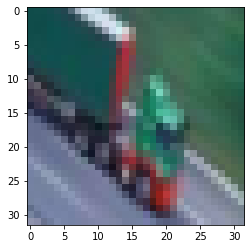

In [22]:
# tho show the image now i need to apply a permutation on img tensor
plt.imshow(img.permute(1,2,0))

In [0]:
# stack of all tensors of dim=3
# converting all images to a tensor and bring it to a stack
imgs = torch.stack([img_tensor for img_tensor, _ in dataset], dim=3)

In [24]:
imgs.shape

torch.Size([3, 32, 32, 50000])

In [25]:
# Calculating mean
# If there is any situation that you don't know how many rows you want
# but are sure of the number of columns, then you can specify this with
# a -1
# .view() creates a new Tensor of given dimension 3 by -1(keeps same number of columns)
imgs.view(3, -1).mean(dim=1)

tensor([0.4915, 0.4823, 0.4468])

In [26]:
#Calculating standard dev.
imgs.view(3, -1).std(dim=1)

tensor([0.2470, 0.2435, 0.2616])

In [0]:
transform = transforms.Compose(
    [transforms.ToTensor(),
     transforms.Normalize((0.4915, 0.4823, 0.4468),(0.2470, 0.2435, 0.2616))
     ])

In [33]:
dataset = datasets.CIFAR10(data_path, train=True, download=True, transform=transform)

Files already downloaded and verified


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


'frog'

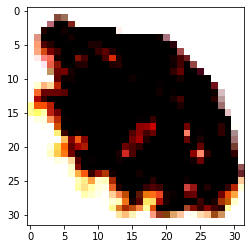

In [35]:
img_transformed, label = dataset[125]
plt.imshow(img_transformed.permute(1,2,0))
classes[label]